# Initializing

In [1]:
#Active environment should be aws_env
!conda info | grep 'active env'

     active environment : aws_env
    active env location : /home/hassan101/anaconda3/envs/aws_env


In [2]:
#Get AWS credentials from environment
import os
aws_akid = os.environ['AWS_KID']
aws_sak = os.environ['AWS_AK']

import boto3
client = boto3.client('iam', aws_access_key_id=aws_akid, aws_secret_access_key= aws_sak)
users = client.list_users()
for key in users['Users']:
    print('Active User:', key['UserName'])

Active User: usr_hassan


In [3]:
#Importing libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

# Getting train and test splits locally

In [4]:
Xy_train = pd.read_csv('Xy_train.csv', index_col=0)
Xy_test = pd.read_csv('Xy_test.csv', index_col=0)

X_train = Xy_train.iloc[:,:-1]
X_test = Xy_test.iloc[:,:-1]

y_train = Xy_train.iloc[:,[-1]]
y_test = Xy_test.iloc[:,[-1]]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4930, 20)
(4930, 1)
(2113, 20)
(2113, 1)


In [5]:
#Get names of numerical and categorical columns
from pandas.api.types import is_object_dtype, is_numeric_dtype, is_bool_dtype

num_col = []
cat_col = []

#Scanning all feature columns in X_train
for col in X_train.columns: 
    if is_object_dtype(X_train[col]):
        cat_col.append(col)
    else:
        num_col.append(col)

print('Num Col:',num_col)
print('Cat Col:', cat_col)

Num Col: ['tenure', 'monthlycharges', 'totalcharges']
Cat Col: ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [6]:
#Removing customer id from cat_col
cat_col.remove('customerid')
cat_col

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

# Featurizing

In [7]:
#We will use dic vectorizer for OHE
from sklearn.feature_extraction import DictVectorizer

X_train_dicts = X_train[cat_col + num_col].to_dict(orient='records') #orient=records ensures records are based on rows not columns

This created a list of dictionary for X_train dataset, with each row of dataset as a dictioary in the list. This is how the first row in dictionary list looks like:

In [8]:
X_train_dicts[0]

{'gender': 'male',
 'seniorcitizen': 'no',
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 20,
 'monthlycharges': 68.7,
 'totalcharges': 1416.2}

Now we will create dictionary vectorizer. The `sparse=True` argument will produce sparse matrix in sparse row format (special way of encoding data when there are many zeros - may work well when there are too many distinct values)

In [9]:
dv = DictVectorizer(sparse=False)
dv.fit(X_train_dicts)
Xohe_train_array = dv.transform(X_train_dicts)

display(Xohe_train_array[0])
display(dv.get_feature_names_out())
display(Xohe_train_array.shape)

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 6.8700e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+01,
       1.4162e+03])

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen=no',
       'seniorcitizen=yes', 'streamingmovies=no',
       'stream

(4930, 46)

Now do the same for validation data

In [10]:
X_test_dicts = X_test[cat_col + num_col].to_dict(orient='records')
Xohe_test_array = dv.transform(X_test_dicts)
Xohe_test_array.shape

(2113, 46)

# Training via pipelienes

In [ ]:
#Setup MLDev pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

mldev_pipeline = {
    'logreg': make_pipeline(StandardScaler(), LogisticRegression()),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier())
}

for model_name, pipeline in mldev_pipeline.items():
    print(model_name)
    print(pipeline)

In [ ]:
#These can also be viewed visually
mldev_pipeline['logreg']

In [ ]:
#Check the parameters for these models
print('LinReg Params:',LogisticRegression().get_params())
print('RF Params:',RandomForestClassifier().get_params())
print('GB Params:',GradientBoostingClassifier().get_params())

In [ ]:
#Create a grid for hyperparameters tuning
hpgrid = {

    'logreg':{
    },
    
    'rf':{
        'randomforestclassifier__n_estimators':[100, 200, 300],
        'randomforestclassifier__max_depth':[5, 10, 'None']
    },

    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300],
        'gradientboostingclassifier__learning_rate':[0.1, 0.2],
    }
}

In [ ]:
#Training the models by looping across pipeline
from sklearn.model_selection import GridSearchCV

trained_models = {}
for model_name, pipeline in mldev_pipeline.items():
    #Train using CV class
    print(f'Training model: {model_name}')
    model = GridSearchCV(pipeline, hpgrid[model_name], n_jobs = -1, cv = 10) #n_jobs = -1 will use all processors for parallel computing
    model.fit(Xohe_train_array, y_train.values.ravel())
    trained_models[model_name] = model

trained_models

In [ ]:
# Check metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

for model_name, model in trained_models.items():
    
    y_hat = model.predict_proba(Xohe_test_array)[:,1]
    #Converting to 1/0 based on threshold of 0.5
    y_hat = (y_hat >=0.5).astype(int)
    print(f'\nMetrics for {model_name}:',
    'Accuracy=', accuracy_score(y_test, y_hat),
    'Precision=', precision_score(y_test,y_hat),
    'Recall=', recall_score(y_test,y_hat),
    'Confusion matrix=', confusion_matrix(y_test,y_hat,labels=[0, 1])   
    )

In [ ]:
#Checking parameters for the best model
best_model = trained_models['logreg']
display(best_model.get_params())

In [ ]:
#Checking parameters for the best estimator of that model
best_estimator = best_model.best_estimator_ #This will give a pipeline. To select an estimator you need to specify it as dictionary value.
best_estimator['logisticregression'].get_params()

Check model coefficients associated with best estimator of logistic regression

In [ ]:
display(best_estimator['logisticregression'].coef_)
display(best_estimator['logisticregression'].intercept_)

In [ ]:
# Lets check probability induced by bias
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
print(sigmoid(best_estimator['logisticregression'].intercept_))

This equates to 16%. This means that the model is 16% biased towards predictions without even looking at customer. This should be as low as possible.

In [ ]:
# Saving best model
import pickle
with open('bestmodel.pkl', 'wb') as f:
    pickle.dump(trained_models['logreg'], f)

In [ ]:
#If we need to reload the model in future, we can use this code
with open('bestmodel.pkl', 'rb') as f:
    reloaded_model = pickle.load(f)

reloaded_model

Once we know what model suits best for the data based on gridsearchCV method, we can train it from scratch later.

# Training from scratch

In [11]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xohe_train_array)

StandardScaler()

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

C=1.0
logreg = LogisticRegression(C=C)

logreg.fit(scaler.transform(Xohe_train_array), y_train.values.ravel())

cv = KFold(n_splits=10, random_state=1, shuffle=True)
cv_scores = cross_val_score(logreg, scaler.transform(Xohe_train_array), y_train.values.ravel(), cv=cv)
display(cv_scores)
print(f'Mean score:{round(np.mean(cv_scores),3)} , STD: {round(np.std(cv_scores),3)}')

array([0.79513185, 0.80527383, 0.81744422, 0.78296146, 0.77484787,
       0.81744422, 0.8296146 , 0.80933063, 0.79716024, 0.78904665])

Mean score:0.802 , STD: 0.016


In [213]:
# Check metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

t = 0.5 #This is the threshold for converting values to 1/0
y_hat = logreg.predict_proba(scaler.transform(Xohe_test_array))[:,1]
#Converting to 1/0 based on threshold of 0.5
y_hat = (y_hat >=t).astype(int)

print(
'Accuracy=', accuracy_score(y_test, y_hat),
'\nPrecision=', precision_score(y_test,y_hat),
'\nRecall=', recall_score(y_test,y_hat),
'\nConfusion matrix=', confusion_matrix(y_test,y_hat,labels=[0, 1])   
)


Accuracy= 0.8088026502602934 
Precision= 0.6255060728744939 
Recall= 0.5852272727272727 
Confusion matrix= [[1400  185]
 [ 219  309]]


In [15]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
#Testing random sample prediction from test set
sample_no = 5

display(X_test_dicts[sample_no])
print('Predicted churn prob:', logreg.predict_proba(scaler.transform(dv.transform(X_test_dicts[sample_no])))[:,1])
print('Actual churn:', y_test.iloc[sample_no].values)

{'gender': 'male',
 'seniorcitizen': 'no',
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 67,
 'monthlycharges': 88.4,
 'totalcharges': 5798.3}

Predicted churn prob: [0.13085403]
Actual churn: [0]


### Saving model and params

In [267]:
import pickle

In [17]:
# Saving model only

#with open('model_fromscratch.pkl', 'wb') as f:
#    pickle.dump(rfreg, f)

In [268]:
# Saving standardization params
#pickle.dump(scaler, open('scaling.pkl','wb'))

# Saving dictioary vectorizer
#pickle.dump(dv, open('dv.pkl','wb'))

In [288]:
# Saving model with standardization params and dv in single file
with open('model_stack_C=%s.pkl' %C, 'wb') as f:
    pickle.dump((logreg, scaler, dv), f)


In [289]:
#Reloading everything
model_reload,scaler_reload,dv_reload = pickle.load(open('model_stack_C=1.0.pkl' , 'rb'))

# Plotting the predictions

### Testing threshold

In above, the predictions are converted to either 0 or 1 based on a threshold of 0.5 (anything equal or above 0.5 is changed to 1 otherwise 0). Instead of using 0.5, we can check the model with different thresholds between 0 and 1 to see if that helps with accuracy. 

0.00 0.250
0.05 0.509
0.10 0.622
0.15 0.674
0.20 0.713
0.25 0.742
0.30 0.762
0.35 0.776
0.40 0.793
0.45 0.803
0.50 0.809
0.55 0.818
0.60 0.808
0.65 0.808
0.70 0.788
0.75 0.770
0.80 0.758
0.85 0.751
0.90 0.750
0.95 0.750
1.00 0.750


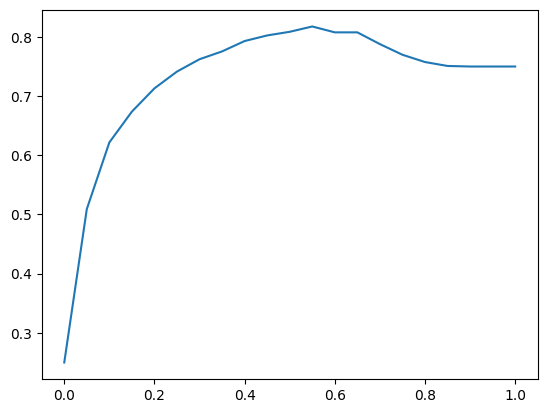

In [27]:
import numpy as np
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    y_hat = logreg.predict_proba(scaler.transform(Xohe_test_array))[:,1]
    y_hat = (y_hat >=t).astype(int)
    acc = accuracy_score(y_test, y_hat)
    scores.append(acc)
    print('%.2f %.3f' % (t, acc))

plt.plot(thresholds, scores)

It seems the optimal region is between 0.45-0.65.

An interesting observation is for threshold of 1 the accuracy is 75%. This means that if model predicts every customer to be NOT churning, it will still give 75% accuracy. This is because we have more customers not churning in our test dataset compared to customers churning.

In [57]:
display(y_test.value_counts())
print(f'Actual NONchurning users in test set: {(y_test.churn.value_counts(normalize=True) * 100)[0] :.0f} %' )
print(f'Actual churning users in test set: {(y_test.churn.value_counts(normalize=True) * 100)[1] :.0f} %' )

churn
0        1585
1         528
dtype: int64

Actual NONchurning users in test set: 75 %
Actual churning users in test set: 25 %


The best accuracy is around 81% at around 0.5 threshold. This means there is only 6% increase in accuracy compared to model which predicts every customer as nonchurning (threshold of 1). So accuracy alone is not the best parameters to assess the model.

This suggests we have class imbalance problem. Will deal with this later. 

### Confusion Matrix

array([[1400,  185],
       [ 219,  309]])

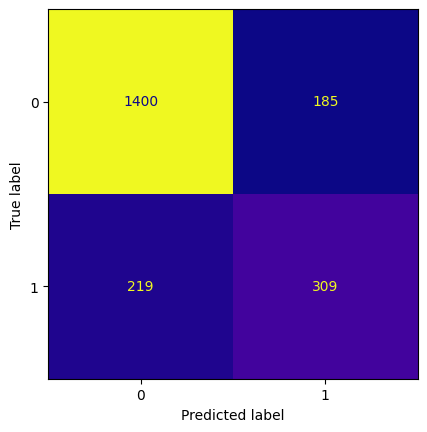

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

t = 0.5 #This is the threshold for converting values to 1/0
y_hat = (logreg.predict_proba(scaler.transform(Xohe_test_array))[:,1] >=t).astype(int)

cm = confusion_matrix(y_test, y_hat, labels=[0, 1])
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='plasma', colorbar=False)

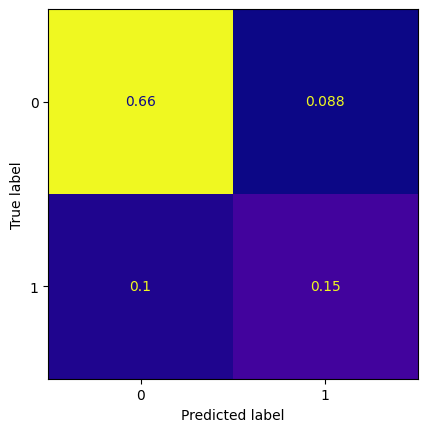

In [82]:
#Plotting fraction
cm_frac = cm/cm.sum()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_frac)
disp.plot(cmap='plasma', colorbar=False)

### Precision and recall

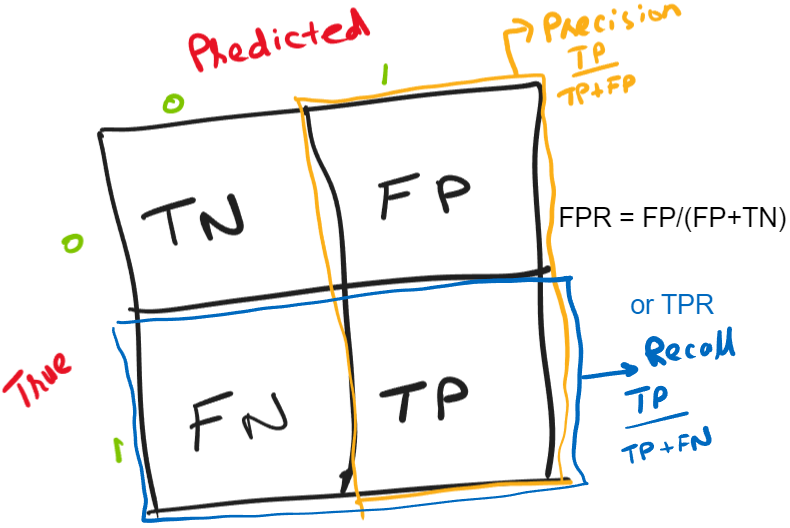

In [89]:
from sklearn.metrics import precision_score, recall_score

precision= precision_score(y_test,y_hat)
recall= recall_score(y_test,y_hat)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.6255060728744939
Recall: 0.5852272727272727


This suggests that:
- When model predicts a customer is churning, it is correct 62% of times
- Out of all customers that churn, the model only correctly predicts 58% of them to churn (also called true positive rate)

### ROC Curves

Ideally, we would like TPR to be as high as possible and TNR as low as possible

In [95]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

FPR = FP/(FP+TN)
TPR = TP/(TP+FN) #should be same as recall
print('FPR:', FPR)
print('TPR:', TPR)

FPR: 0.1167192429022082
TPR: 0.5852272727272727


We should calculate and plot FPR and TPR across all thresholds

In [168]:
def FPR_TPR(y_predicted, y_actual):

    import numpy as np
    thresholds = np.linspace(0,1,101)

    scores = []

    for t in thresholds:
        y_hat = y_predicted
        y_test=y_actual
        y_hat = (y_hat >=t).astype(int)
        cm = confusion_matrix(y_test, y_hat, labels=[0, 1])
        TN = cm[0][0]
        FN = cm[1][0]
        TP = cm[1][1]
        FP = cm[0][1]
        FPR = FP/(FP+TN)
        TPR = TP/(TP+FN)
        scores.append([t, FPR, TPR])

    df_scores = pd.DataFrame()
    df_scores['threshold'] = [i[0] for i in scores]
    df_scores['FPR'] = [i[1] for i in scores]
    df_scores['TPR'] = [i[2] for i in scores]
    display(df_scores.head())

    # Check values with interval of 10
    display(df_scores[::10])

    plt.plot(df_scores.threshold, df_scores.FPR, label='FPR', color = 'r')
    plt.plot(df_scores.threshold, df_scores.TPR,label='TPR',color = 'b')
    plt.legend()
    plt.xlabel('Threshold')
    plt.ylabel('Score')

    return df_scores

,threshold,FPR,TPR
0,0.00,1.000000,1.000000
1,0.01,0.875710,0.996212
2,0.02,0.791798,0.988636
3,0.03,0.738801,0.986742
4,0.04,0.694637,0.982955


,threshold,FPR,TPR
0,0.0,1.000000,1.000000
10,0.1,0.491483,0.962121
20,0.2,0.351420,0.907197
30,0.3,0.250473,0.801136
40,0.4,0.176656,0.702652
50,0.5,0.116719,0.585227
60,0.6,0.060568,0.412879
70,0.7,0.017035,0.202652
80,0.8,0.000000,0.030303
90,0.9,0.000000,0.000000


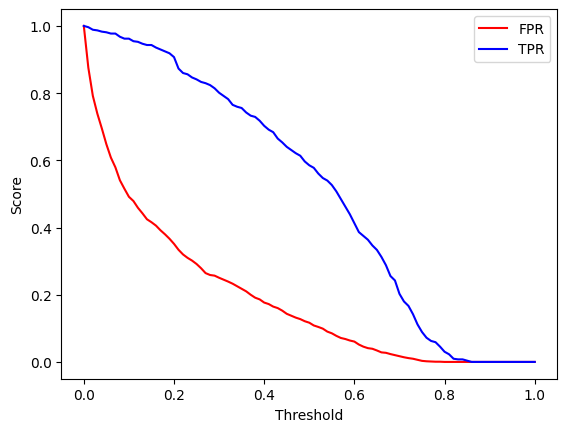

In [169]:
df_scores_model = FPR_TPR(y_predicted = logreg.predict_proba(scaler.transform(Xohe_test_array))[:,1],
        y_actual = y_test
        )

At threshold 0, both FPR and TPR are 100%, because the model predicts everyone as churning. From here, we want FPR to go down as quickly as possible, and TPR to keep as high as possible.

These curves are fundamentally not too intitutive. We should compare them with a baseline model based on random guesses to judge the efficacy.

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       8.81168318e-01, 1.26078480e-01, 6.33460834e-01])

,threshold,FPR,TPR
0,0.00,1.000000,1.000000
1,0.01,0.991798,0.990530
2,0.02,0.980442,0.967803
3,0.03,0.970347,0.956439
4,0.04,0.960883,0.943182


,threshold,FPR,TPR
0,0.0,1.000000,1.000000
10,0.1,0.911672,0.888258
20,0.2,0.813249,0.776515
30,0.3,0.714196,0.668561
40,0.4,0.615773,0.602273
50,0.5,0.515457,0.509470
60,0.6,0.415773,0.403409
70,0.7,0.307256,0.297348
80,0.8,0.216404,0.204545
90,0.9,0.107256,0.106061


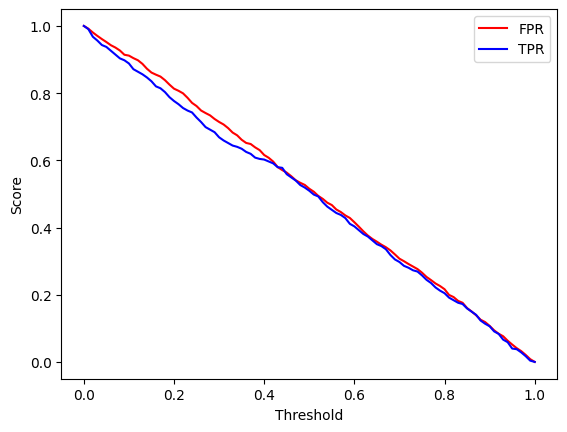

In [170]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_test))
display(y_rand)
df_scores_rand = FPR_TPR(y_predicted = y_rand,
        y_actual = y_test
        )

Now this model is completely based on coin flip. At 0.6 threshold, both TPR and FPR are 0.4, which means in 40% of cases it is predicting customers to be churning and 60% cases as non-churning. So for every customer actually churning it is correctly predicting as churning 40% of times.

So now we have model based on random guesses as a baseline to benchmark our model against. Now lets create an ideal model which gives perfect predictions all the time, as another benchmark for our model.

Zeros: 1585
Ones: 528
Ideal threshold: 0.7501183151916706


,threshold,FPR,TPR
0,0.00,1.000000,1.0
1,0.01,0.986120,1.0
2,0.02,0.972871,1.0
3,0.03,0.959621,1.0
4,0.04,0.946372,1.0


,threshold,FPR,TPR
0,0.0,1.000000,1.000000
10,0.1,0.866246,1.000000
20,0.2,0.733123,1.000000
30,0.3,0.600000,1.000000
40,0.4,0.466877,1.000000
50,0.5,0.333754,1.000000
60,0.6,0.200000,1.000000
70,0.7,0.066877,1.000000
80,0.8,0.000000,0.801136
90,0.9,0.000000,0.401515


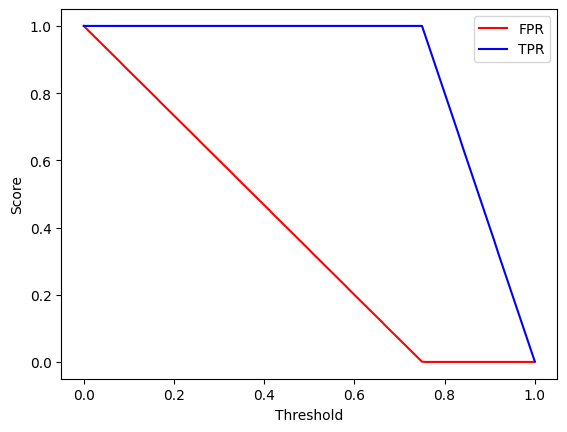

In [171]:
#Check how many 0 and 1 are in y_test
zeros_y_test = (y_test == 0).sum()[0]
ones_y_test = (y_test == 1).sum()[0]
print('Zeros:', zeros_y_test)
print('Ones:', ones_y_test)

#Create an ideal test set based on same number of 0 and 1 as in y_test 
y_ideal_test = np.repeat([0,1], [zeros_y_test, ones_y_test])
#We not create ideal predictions to compare with ideal test set
y_ideal_predictions = np.linspace(0,1,len(y_ideal_test))
#Ideal threshold when y_ideal_predictions will completely mimic y_ideal_test
print('Ideal threshold:', (1-y_test.mean()[0]))

#Now we execute the function again, but change y_test with y_ideal_test
df_scores_ideal = FPR_TPR(y_predicted = y_ideal_predictions,
        y_actual = y_ideal_test
        )


We can see that we get the best results when setting threshold to 0.75, which is an ideal value based on our test set.

By having y_hat the same as y_test, this is what we get:

,threshold,FPR,TPR
0,0.00,1.0,1.0
1,0.01,0.0,1.0
2,0.02,0.0,1.0
3,0.03,0.0,1.0
4,0.04,0.0,1.0


,threshold,FPR,TPR
0,0.0,1.0,1.0
10,0.1,0.0,1.0
20,0.2,0.0,1.0
30,0.3,0.0,1.0
40,0.4,0.0,1.0
50,0.5,0.0,1.0
60,0.6,0.0,1.0
70,0.7,0.0,1.0
80,0.8,0.0,1.0
90,0.9,0.0,1.0


,threshold,FPR,TPR
0,0.00,1.0,1.0
1,0.01,0.0,1.0
2,0.02,0.0,1.0
3,0.03,0.0,1.0
4,0.04,0.0,1.0
...,...,...,...
96,0.96,0.0,1.0
97,0.97,0.0,1.0
98,0.98,0.0,1.0
99,0.99,0.0,1.0


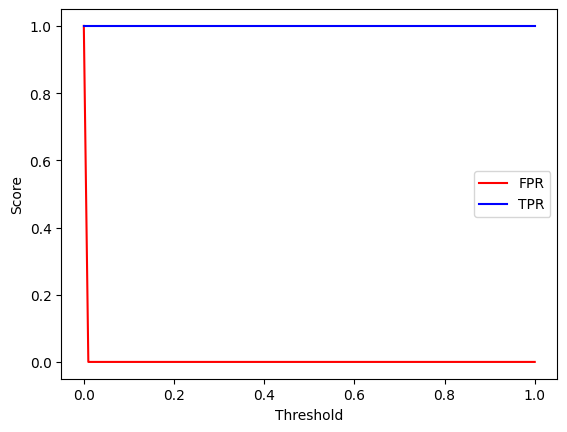

In [172]:
FPR_TPR(y_predicted = y_test,
        y_actual = y_test
        )

So now we know how ideal results look like, which is what our model should strive to achieve

Lets plot all models together:

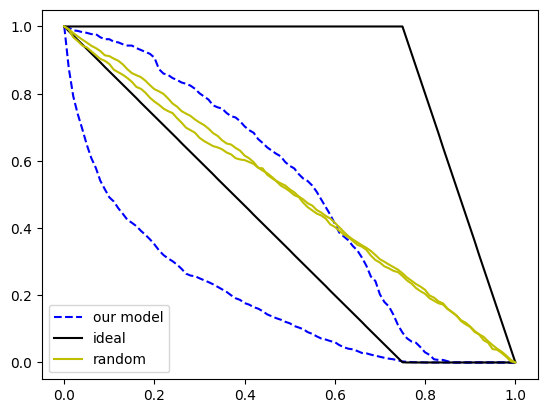

In [186]:
plt.plot(df_scores_model.threshold, df_scores_model.TPR, label='our model', color='b', linestyle = '--')
plt.plot(df_scores_model.threshold, df_scores_model.FPR, label='', color='b',linestyle = '--')

plt.plot(df_scores_ideal.threshold, df_scores_ideal.TPR, label='ideal', color='k')
plt.plot(df_scores_ideal.threshold, df_scores_ideal.FPR, label='', color='k')

plt.plot(df_scores_rand.threshold, df_scores_rand.TPR, label='random', color='y')
plt.plot(df_scores_rand.threshold, df_scores_rand.FPR, label='', color='y')

plt.legend()

Plotting against threshold isn't always helpful. We saw that for our model optimal threshold is around 0.5, but for ideal it is 0.75.

It is best to plot FPR vs TPR

Text(0, 0.5, 'TPR')

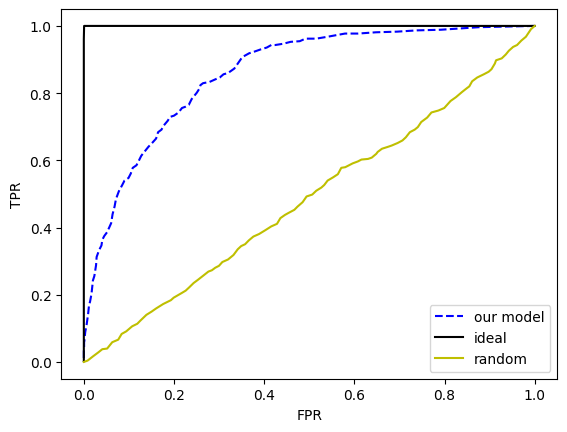

In [188]:
plt.plot(df_scores_model.FPR, df_scores_model.TPR, label='our model', color='b', linestyle = '--')

plt.plot(df_scores_ideal.FPR, df_scores_ideal.TPR, label='ideal', color='k')

plt.plot(df_scores_rand.FPR, df_scores_rand.TPR, label='random', color='y')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

For simplicity, we can replace random with a straight line between 0,1 and ideal model with line between 0,1,1

Text(0, 0.5, 'TPR')

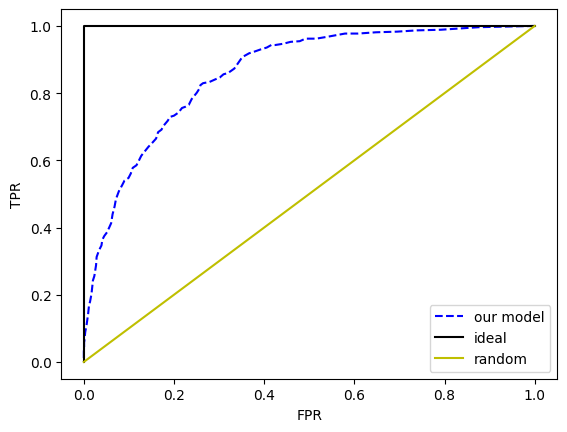

In [196]:
plt.plot(df_scores_model.FPR, df_scores_model.TPR, label='our model', color='b', linestyle = '--')
plt.plot([0,0,1], [0,1,1], label='ideal', color='k')
plt.plot([0,1], [0,1], label='random', color='y')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

Each point on the curve is at different threshold. We need to calculate TPR and FPR at different thresolds to make this graph.

Which is how ROC curve looks like. We want our model to be as close as possible to ideal line, and as far as possible from random line.

An easy way is to use sklearn:

Text(0, 0.5, 'TPR')

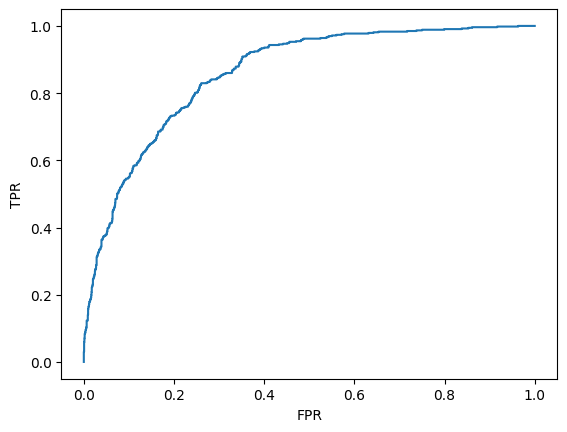

In [205]:
#Getting ROC curve from sklearn
from sklearn.metrics import roc_curve
y_hat = logreg.predict_proba(scaler.transform(Xohe_test_array))[:,1]
FPR_roc, TPR_roc, thresholds_roc = roc_curve(y_test, y_hat)
plt.plot(FPR_roc, TPR_roc)
plt.xlabel('FPR')
plt.ylabel('TPR')

We also want to look at area under the curve (AUC) which tells us how good our classifier is

In [221]:
from sklearn.metrics import auc
auc_model = auc(FPR_roc,TPR_roc)
print('AUC of our model:', auc_model)

auc_ideal = auc(df_scores_ideal.FPR.values, df_scores_ideal.TPR.values)
auc_rand = auc(df_scores_rand.FPR.values, df_scores_rand.TPR.values)
print('AUC of ideal model:', auc_ideal)
print('AUC of random model:', auc_rand)

AUC of our model: 0.8587324347576712
AUC of ideal model: 0.9999874533983366
AUC of random model: 0.4842850826880795


Ideal model AUC = 1.0

Random model AUC = 0.5

Our model AUC should always be between 0.5 to 1.0. Higher the better.

In [212]:
#Alternatively, ROC_AUC_SCORE() can be used for the same value:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_hat)
print('AUC of model:', roc_auc)

AUC of model: 0.8587324347576712
